# Resampling Datetime Data (Core)


*Christina Brockway*

Use weather data from London from Kaggle:  https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data

A modified version for this project:  https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing


## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as msno

import seaborn as sns
import numpy as np

import datetime as dt



In [2]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

## Load Data

In [3]:

df=pd.read_csv('data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Convert to datetime dtype

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date'] = pd.to_datetime(df['date'].dt.strftime('%B %Y'))

### Set date column as index

In [5]:
df= df.set_index('date')
df.head(1)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0


### Filter out dates from 2000 on and keep only:
-  precipitation
-  mean temp
-  max temp
-  min temp
-  snow depth

In [6]:
df.sort_index()
#Slide dates
From = "20200101"
To = "20101231"
dff= df.copy()
dff=dff.loc[:,['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]

In [7]:
dff=dff.loc['20000101':"20101231"]
dff.tail()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2010-12-01,5.0,0.2,-4.6,8.0,1.0
2010-12-01,0.4,5.3,2.5,9.5,0.0
2010-12-01,1.4,6.8,4.1,7.7,0.0
2010-12-01,0.0,6.9,6.1,6.8,NaN
2010-12-01,0.0,5.9,5.0,7.2,0.0


### Impute missing values

In [8]:
dff.isna().sum()

precipitation     196
mean_temp         224
min_temp          196
max_temp          196
snow_depth       1049
dtype: int64

In [9]:
#interpolate temperature measures
dff['mean_temp'] = dff['mean_temp'].interpolate()
dff['max_temp'] = dff['max_temp'].interpolate()
dff['min_temp'] = dff['min_temp'].interpolate()

In [10]:
#Fill precipitation values with 0
dff['precipitation']= dff['precipitation'].fillna(0)
dff['snow_depth'] = dff['snow_depth'].fillna(0)

In [11]:
dff.isna().sum()


precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [12]:
temp= dff.copy()

# Q1 What month had the most precipitation between 2000 through 2010?

In [13]:
## Resample using .sum()
temp1=temp.resample("MS").sum()
temp1.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,14.3,174.05,82.10,262.95,0.0
2000-02-01,62.2,208.25,113.20,298.50,0.0
2000-03-01,13.4,263.25,151.65,377.45,0.0
2000-04-01,71.8,269.90,158.25,394.85,0.0
2000-05-01,68.4,427.75,295.40,556.30,0.0


In [14]:
max_prep = temp1['precipitation'].idxmax()
locmonths = mdates.MonthLocator(interval=3)
locyear = mdates.YearLocator(1)
fmtyear = mdates.DateFormatter("%Y")
titlep=  'Precipitation for 2000-2010'
ylabel = 'Inches'

In [15]:
max_prep = temp1['precipitation'].idxmax(axis=0).strftime('%B %Y')
max_prep

#adapted from: askpython.com/python/examples/obtain-current-year-and-month

'November 2009'

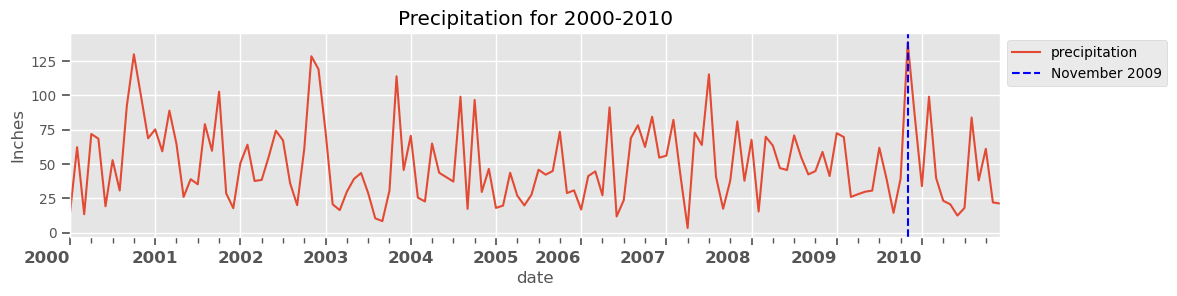

In [16]:
fig, ax = plt.subplots(figsize=(12,3))

#Set ticklabel format
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 'large', fontweight= 'bold')

#Set major ticks
ax.xaxis.set_major_locator(locyear)
ax.xaxis.set_major_formatter(fmtyear)

#Set minor ticks
ax.xaxis.set_minor_locator(locmonths)

fig.autofmt_xdate(which='major', rotation=90)
temp1['precipitation'].plot(ax=ax, title=titlep)
ax.axvline(max_prep, color='blue', linestyle= "--", label=f'{max_prep}')
ax.legend(bbox_to_anchor=[1,1]);ax.legend(bbox_to_anchor=[1,1])
ax.set_ylabel(ylabel)
plt.show();



# Q2 Which year between 2000-2020 had the coolest average temperature?

In [17]:
## Resample using .sum()
temp2=temp.resample("Y").mean()
temp2.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-12-31,1.974863,11.575683,8.001503,15.144672,0.008197
2001-12-31,1.850411,11.331507,7.647397,15.036575,0.000000
2002-12-31,2.060000,12.084247,8.425890,15.815205,0.000000
2003-12-31,1.261096,12.114521,7.895890,16.360274,0.024658
2004-12-31,1.622131,11.900683,8.234563,15.549044,0.005464


In [18]:
low_temp= temp2['mean_temp'].idxmax().strftime('%Y')
locminor = mdates.YearLocator(1)
locmajor = mdates.YearLocator(5)
fmtyear = mdates.DateFormatter("%Y")
titlet=  'Average Temperature'
ylabel='Degrees'

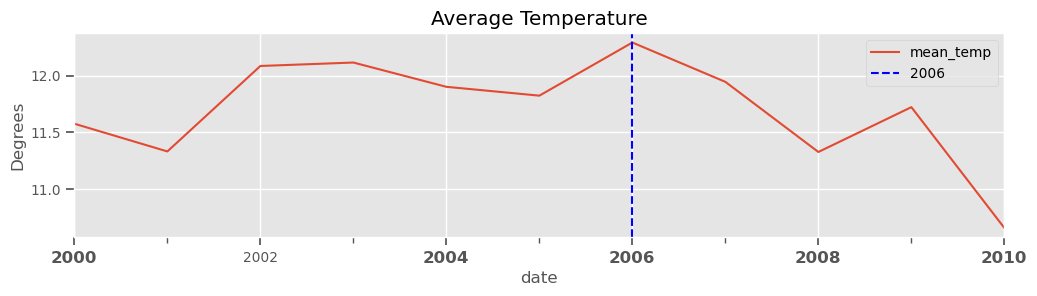

In [19]:
fig, ax = plt.subplots(figsize = (12,3))

ax.set()

#Set major ticks
ax.xaxis.set_major_locator(locmajor)
ax.xaxis.set_major_formatter(fmtyear)

#Set minor ticks
ax.xaxis.set_minor_locator(locminor)

#Set ticklabel format
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 'large', fontweight= 'bold')


fig = ax.get_figure()
fig.autofmt_xdate(rotation=90, ha= 'center')

temp2['mean_temp'].plot(ax=ax, title=titlet)
ax.axvline(low_temp, color='blue', linestyle= "--", label=f'{low_temp}')
ax.set_ylabel(ylabel)
ax.legend(bbox_to_anchor=[1,1]);ax.legend(bbox_to_anchor=[1,1])
plt.show();